### Estudo de caso com python para automatizar a geração de relatórios para auxiliar na tomada de decisão nos investimentos (Verificar se existe um spread entre os BRDs e as ações correspondentes)

# Importação das bibliotecas

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Captura dos dados

In [ ]:
apple = yf.download(['AAPL34.SA', 'AAPL'], start = '2022-01-01')['Adj Close'] # Download dos dados do BRD e da ação da apple
                                                                              # Está sendo utilizado o Adj Close por ser mais correto já que considera os dividendos.
apple.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,AAPL34.SA
Date,,
2022-01-03,179.724564,51.137226
2022-01-04,177.443542,50.771610
2022-01-05,172.723587,49.467239
2022-01-06,169.840256,48.177692
2022-01-07,170.008118,48.266628


# Preenchendo os dados faltantes com o recurso de ffill


In [ ]:
apple = apple.ffill(axis=0)

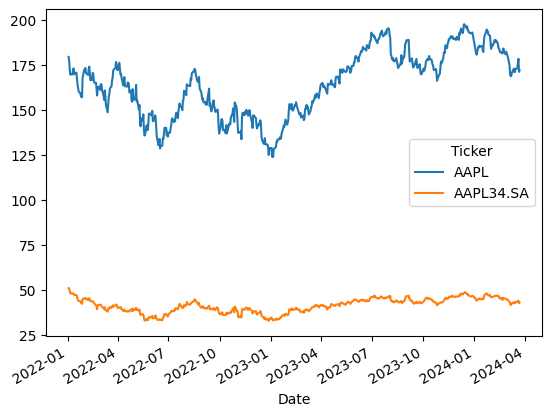

In [ ]:
apple.plot();

# Normalizando os dados

Pegar o dataframe do ativo e dividir os dados pela primeira linha para assim partir do mesmo ponto inicial.
Dessa forma é que se interpretar em uma situação real, você iniciaria com 1 real na data 2022-01-03 e em 2022-01-07 você teria 0.94.

In [ ]:
apple_normalizado = apple/apple.iloc[0]
apple_normalizado

Ticker,AAPL,AAPL34.SA
Date,,
2022-01-03,1.000000,1.000000
2022-01-04,0.987308,0.992850
2022-01-05,0.961046,0.967343
2022-01-06,0.945003,0.942126
2022-01-07,0.945937,0.943865
...,...,...
2024-03-18,0.966590,0.853195
2024-03-19,0.979721,0.862581
2024-03-20,0.994132,0.863559


<Axes: xlabel='Date'>

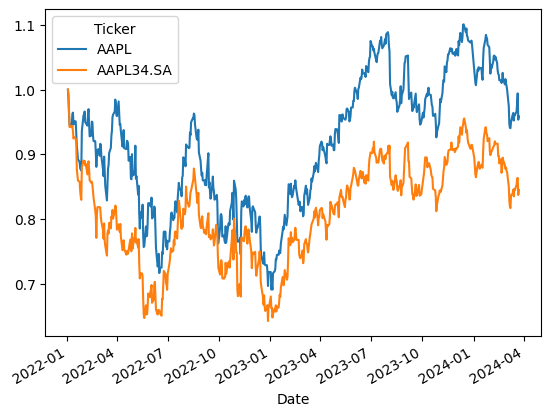

In [ ]:
apple_normalizado.plot()

#Criando função para análise de várias janelas de tempo

In [ ]:
def compara_ativos(inicio):
  dados = yf.download(['AAPL34.SA', 'AAPL'], start = inicio, progress = False)['Adj Close']
  dados = dados.dropna() # Remover dados faltantes (Para fins de explicação)
  dados = dados/dados.iloc[0]
  dados.plot();

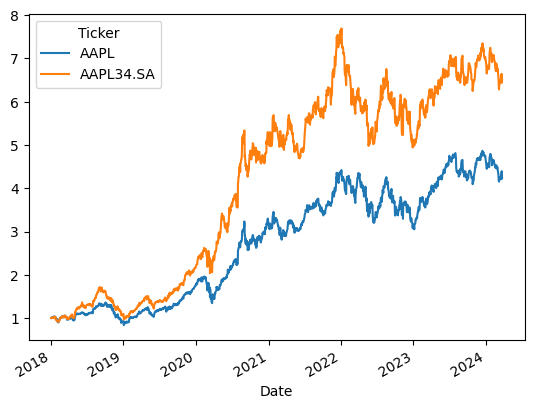

In [ ]:
compara_ativos('2018-01-01')

# Criando loop para geração do relatório

In [ ]:
datas = ['2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01','2023-01-01','2024-01-01']

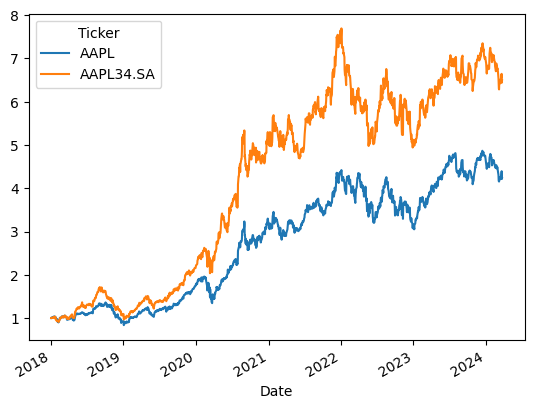

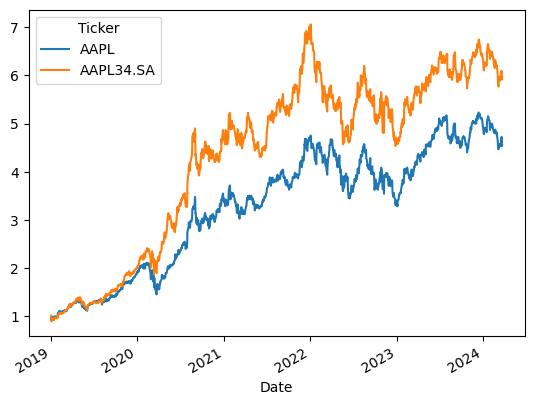

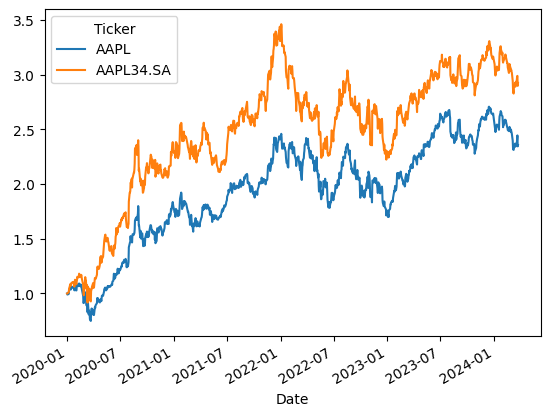

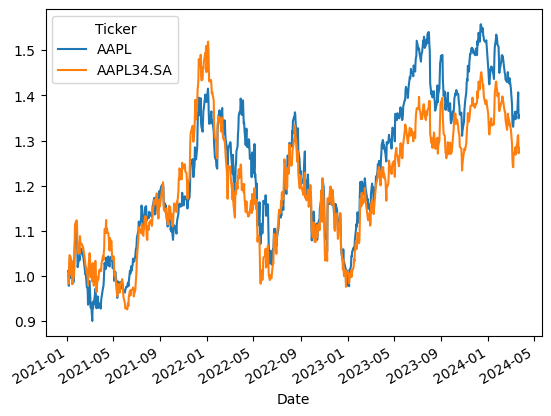

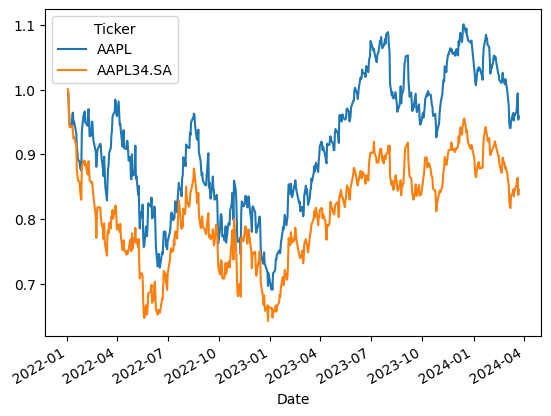

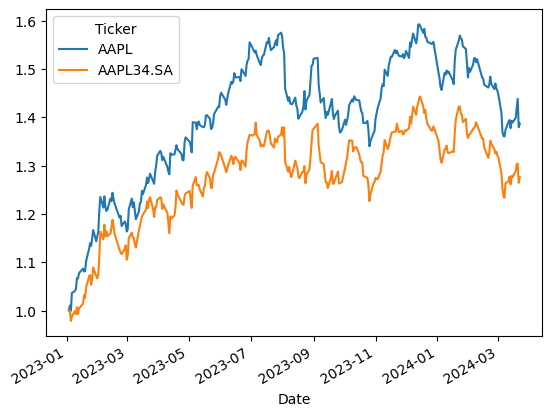

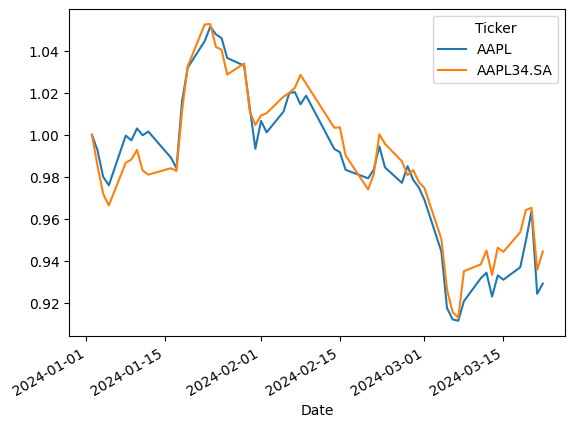

In [ ]:
relatorio = PdfPages('Relatório_acao_vs_pdf.pdf')

for data in datas:
  relatorio.savefig(compara_ativos(data)) # A cada figura gerada salva os dados no pdf criado com o recurso PdfPages
relatorio.close()

# Mensurando o impacto do câmbio

In [ ]:
dados = yf.download(['AAPL34.SA','AAPL','USDBRL=X'],start='2023-01-03')['Adj Close']
dados.head()

[*********************100%%**********************]  3 of 3 completed


Ticker,AAPL,AAPL34.SA,USDBRL=X
Date,,,
2023-01-03,124.216293,33.854111,5.360131
2023-01-04,125.497498,33.873989,5.478500
2023-01-05,124.166641,33.128525,5.430100
2023-01-06,128.735229,33.426712,5.349800
2023-01-09,129.261612,33.824291,5.224400


Criando nova coluna para encontrar o preço de AAPL em reais

In [ ]:
dados = dados.ffill(axis = 0) # Preenchendo os dados faltantes

In [ ]:
dados['Apple_reais'] = dados['AAPL'] * dados['USDBRL=X']
dados

Ticker,AAPL,AAPL34.SA,USDBRL=X,Apple_reais
Date,,,,
2023-01-03,124.216293,33.854111,5.360131,665.815578
2023-01-04,125.497498,33.873989,5.478500,687.538026
2023-01-05,124.166641,33.128525,5.430100,674.237274
2023-01-06,128.735229,33.426712,5.349800,688.707745
2023-01-09,129.261612,33.824291,5.224400,675.314371
...,...,...,...,...
2024-03-19,176.080002,44.110001,5.029400,885.576739
2024-03-20,178.669998,44.160000,5.030000,898.710128
2024-03-21,171.369995,42.810001,4.966200,851.057648


Normalizando o dataframe

In [ ]:
dados_normalizados = dados/dados.iloc[0]
dados_normalizados

Ticker,AAPL,AAPL34.SA,USDBRL=X,Apple_reais
Date,,,,
2023-01-03,1.000000,1.000000,1.000000,1.000000
2023-01-04,1.010314,1.000587,1.022083,1.032625
2023-01-05,0.999600,0.978567,1.013054,1.012649
2023-01-06,1.036380,0.987375,0.998073,1.034382
2023-01-09,1.040617,0.999119,0.974678,1.014266
...,...,...,...,...
2024-03-19,1.417527,1.302944,0.938298,1.330063
2024-03-20,1.438378,1.304421,0.938410,1.349788
2024-03-21,1.379610,1.264544,0.926507,1.278218


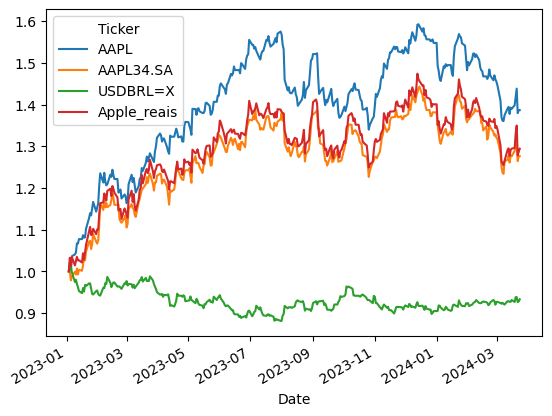

In [ ]:
dados_normalizados.plot();